# Code below is purley to explore data and make sense of it through pandas to identify patterns or issues with the data
# It is only used to gain insights into the data which is translated in the 02 section of the project

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('df_0819.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'backers_count', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable',
       'launched_at', 'name', 'pledged', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'cat_name', 'cat_slug', 'loc_state', 'time_allowed',
       'goal/time_allowed'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0','loc_state','static_usd_rate', 'urls', 'id', 'is_starrable', 'disable_communication', 'fx_rate'],1,inplace=True)

In [6]:
plot_data_1 = df[(df['time_allowed'] < 5000) & (df['goal'] < 2e6)]

In [7]:
len(plot_data_1)

8333

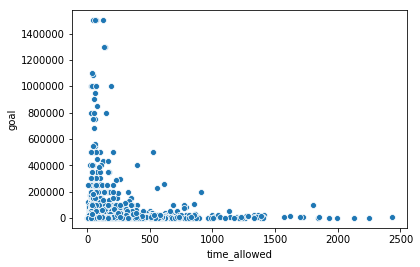

In [8]:
sns.scatterplot('time_allowed','goal',data=plot_data_1)

In [9]:
plot_data_2 = pd.DataFrame()

In [10]:
plot_data_2['log_goal'] = np.log(df[(df['goal'] < 2e6)]['goal'])

In [11]:
plot_data_2['log_time_allowed'] = np.log(df[(df['time_allowed'] < 5000)]['time_allowed'])

In [12]:
plot_data_2.corr()

,log_goal,log_time_allowed
log_goal,1.000000,0.251381
log_time_allowed,0.251381,1.000000


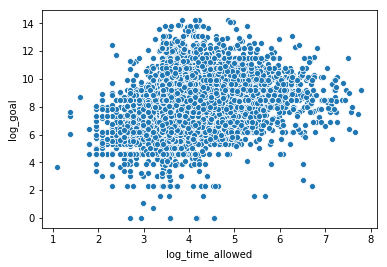

In [13]:
sns.scatterplot('log_time_allowed','log_goal',data=plot_data_2)

In [14]:
pd.DataFrame(df.groupby(['country','state'])['backers_count'].sum()).unstack()['backers_count'].sort_values('successful')

state,failed,successful
country,,
SAmerica,268,2782
Aus,1473,18833
Aisa,660,22022
Euro,6687,174292
NAmerica,29739,981386


In [15]:
pd.DataFrame(df.groupby(['country','state'])['time_allowed'].mean())

time_allowed
country  state                   
Aisa     failed         66.781250
         successful     77.481481
Aus      failed         66.514851
         successful     61.000000
Euro     failed         68.988942
         successful     74.489707
NAmerica failed         84.589635
         successful     86.489781
SAmerica failed         62.950000
         successful     60.333333

In [16]:
df.groupby(['country','state'])['goal'].mean().unstack().round()

state,failed,successful
country,,
Aisa,82395.0,108596.0
Aus,43713.0,9458.0
Euro,26291.0,9551.0
NAmerica,31571.0,9234.0
SAmerica,142798.0,66359.0


In [17]:
df.groupby(['country', 'state']).agg({'state': 'count'}).groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()), 0)).unstack()['state'].sort_values('successful', ascending=False)

state,failed,successful
country,,
Aisa,28.0,72.0
NAmerica,37.0,63.0
Euro,41.0,59.0
Aus,46.0,54.0
SAmerica,51.0,49.0


In [18]:
df.columns

Index(['backers_count', 'converted_pledged_amount', 'country', 'created_at',
       'currency', 'current_currency', 'deadline', 'goal', 'launched_at',
       'name', 'pledged', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'usd_pledged', 'cat_name', 'cat_slug',
       'time_allowed', 'goal/time_allowed'],
      dtype='object')

In [26]:
df.groupby(['state','staff_pick'])['staff_pick'].count()

state       staff_pick
failed      False         3064
            True            96
successful  False         4198
            True           976
Name: staff_pick, dtype: int64

In [22]:
df.groupby(['cat_slug','state'])['state'].count().unstack().round().sort_values('failed', ascending=False)[0:5]

state,failed,successful
cat_slug,,
music/hip-hop,149.0,30.0
crafts/diy,101.0,27.0
technology/wearables,74.0,59.0
games/mobile games,73.0,9.0
technology/software,70.0,27.0
